In [1]:
import zeug
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [17]:
from collections import defaultdict


class TsGraph:
    def __init__(self, window=2):
        self.window = window
        self.graph = defaultdict(dict, {0: {}})
        self.weights = defaultdict(int)
        self.result = {}
        self.loc = 0
        self.next_loc = 1
        
    def fit(self, ts):
        seqs = zeug.sequence_ts(ts, window=self.window)

        for j, seq in enumerate(seqs):
            for i in range(len(seq)-1):
                t0, t1 = seq[i], seq[i+1]
                
                self.go_with(t0, t1=t1)
                
                if i == len(seq)-2:
                    self.go_with(t1)
                
            self.loc = 0
            if j == 200:
                break
            
        self.build_result()    
        return self.result
            
    def go_with(self, t0, t1=None):
        if t0 in self.graph[self.loc]:
            self.weights[self.loc, self.graph[self.loc][t0]] += 1
            self.loc = self.graph[self.loc][t0]
        elif t1 is not None:
            next_loc = self.where_to_go(t1)
            self.graph[self.loc][t0] = next_loc
            self.weights[self.loc, next_loc] += 1
            self.loc = next_loc
        else:
            next_loc = self.next_loc
            self.graph[self.loc][t0] = next_loc
            self.weights[self.loc, next_loc] += 1
            self.loc = next_loc
            self.next_loc += 1
            
    def where_to_go(self, t):
        next_loc = None
        for k, v in self.graph.items():
            if t in v and self.weights[self.loc, k] == 0 and self.loc != k and self.weights[k, self.loc] == 0:
                next_loc = k
        if next_loc is None:
            next_loc = self.next_loc
            self.next_loc += 1
        return next_loc
    
    
    def build_result(self):
        for k, v in self.graph.items():
            for ki, vi in v.items():
                self.result[k, vi] = {
                    "value": ki,
                    "weight": self.weights[k, vi]
                }


ts = [11, 22, 33, 22, 33, 22, 11]
ts = np.abs(np.diff(zeug.synth_ts(100)).round(0))
ts = [1, 2, 3, 1, 2]
print(ts)
g = TsGraph(window=4)
result = g.fit(ts)

[1, 2, 3, 1, 2]


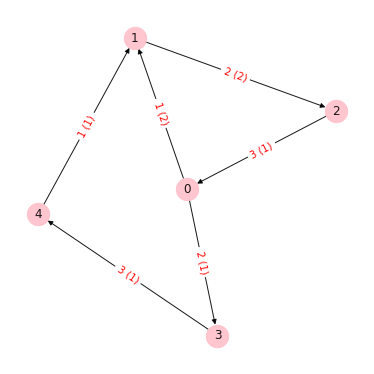

In [18]:
dt = {}
for key, value in result.items():
    dt[key] = f"{value['value']} ({value['weight']})"

DG = nx.DiGraph()
DG.add_edges_from(dt.keys())
pos = nx.spring_layout(DG)
plt.figure(figsize=(5, 5))    
nx.draw(DG,pos,edge_color='black',width=1,linewidths=1,\
node_size=500,node_color='pink',alpha=0.9,\
labels={node:node for node in DG.nodes()})
nx.draw_networkx_edge_labels(DG,pos,edge_labels=dt,font_color='red')
plt.axis('off')
plt.show()

In [16]:
len(DG.nodes()), len(DG.edges())

(50, 87)

In [12]:
g.result

{(0, 1): {'value': 4.0, 'weight': 20},
 (0, 2): {'value': 3.0, 'weight': 24},
 (0, 3): {'value': 1.0, 'weight': 26},
 (0, 8): {'value': 0.0, 'weight': 15},
 (0, 11): {'value': 5.0, 'weight': 31},
 (0, 12): {'value': 2.0, 'weight': 22},
 (0, 15): {'value': 6.0, 'weight': 20},
 (0, 20): {'value': 7.0, 'weight': 19},
 (0, 33): {'value': 10.0, 'weight': 4},
 (0, 60): {'value': 9.0, 'weight': 7},
 (0, 61): {'value': 8.0, 'weight': 12},
 (0, 44): {'value': 11.0, 'weight': 1},
 (1, 2): {'value': 3.0, 'weight': 5},
 (1, 17): {'value': 0.0, 'weight': 4},
 (1, 13): {'value': 1.0, 'weight': 5},
 (1, 52): {'value': 2.0, 'weight': 1},
 (1, 34): {'value': 6.0, 'weight': 3},
 (1, 58): {'value': 8.0, 'weight': 2},
 (1, 61): {'value': 7.0, 'weight': 1},
 (1, 82): {'value': 9.0, 'weight': 1},
 (1, 60): {'value': 5.0, 'weight': 2},
 (1, 97): {'value': 4.0, 'weight': 1},
 (1, 116): {'value': 10.0, 'weight': 1},
 (2, 3): {'value': 1.0, 'weight': 4},
 (2, 6): {'value': 4.0, 'weight': 3},
 (2, 8): {'value': 